In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

KeyboardInterrupt: 

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

image preprocessing

In [ ]:

def plot_samples(images, labels, num_samples=8):
    plt.figure(figsize=(6, 6))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {np.argmax(labels[i])}")
    plt.tight_layout()

neural network

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),        
    Dense(128, activation='relu'),        
    Dropout(0.4),                         
    Dense(64, activation='relu'),        
    Dense(10, activation='softmax')
    ])  

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


backward propogation and training 

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=8, batch_size=13, validation_split=0.1)

Epoch 1/80
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8307 - loss: 0.5420 - val_accuracy: 0.9647 - val_loss: 0.1209
Epoch 2/80
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9368 - loss: 0.2048 - val_accuracy: 0.9707 - val_loss: 0.1058
Epoch 3/80
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9487 - loss: 0.1697 - val_accuracy: 0.9753 - val_loss: 0.0847
Epoch 4/80
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9552 - loss: 0.1432 - val_accuracy: 0.9762 - val_loss: 0.0780
Epoch 5/80
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9577 - loss: 0.1339 - val_accuracy: 0.9788 - val_loss: 0.0716
Epoch 6/80
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9623 - loss: 0.1192 - val_accuracy: 0.9775 - val_loss: 0.0669
Epoch 7/80
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9635 - loss: 0.1163 - val_accuracy: 0.9813 - val_loss: 0.0666
Epoch 8/80
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9657 - loss: 0.1055

saving the model

In [ ]:
model.save('traing.h5')

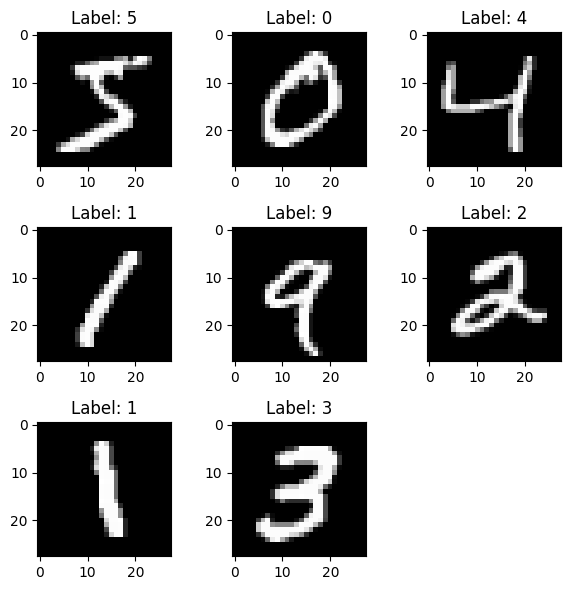

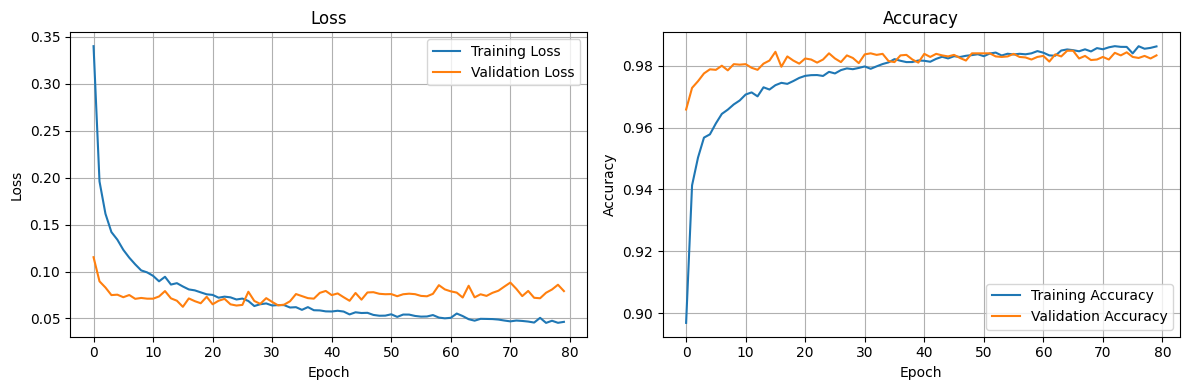

In [ ]:
def plot_training_history(history):
  plot_samples(x_train, y_train)

  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.legend()
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.legend()
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)

  plt.tight_layout()
plot_training_history(history)
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
model = load_model('traing.h5')
image_path = 'D:\\coding\\5.png'
img = load_img(image_path, target_size=(28, 28), color_mode="grayscale")  
img_array = img_to_array(img) / 255.0 
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print("Predictions:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predictions: 5


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]
